Some visualiser technique examples

In [78]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
import numpy as np

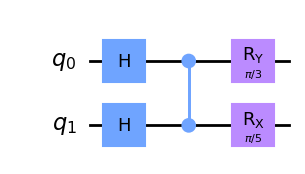

In [79]:
circuit = QuantumCircuit(2)
circuit.h([0,1])
circuit.cz(0,1)
circuit.ry(np.pi/3, 0)
circuit.rx(np.pi/5, 1)
circuit.draw('mpl')

In [80]:
from qiskit.quantum_info import Statevector
state = Statevector.from_int(0, 2**2)
state = state.evolve(circuit)
state.draw('latex')

<IPython.core.display.Latex object>

In [81]:
from qiskit.visualization import array_to_latex
array_to_latex(state)

<IPython.core.display.Latex object>

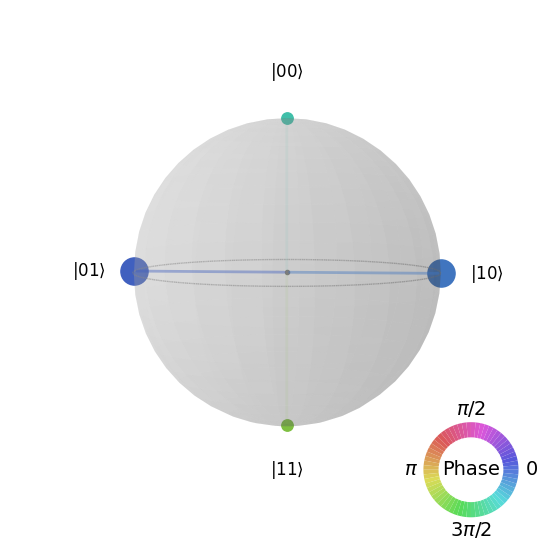

In [82]:
state.draw('qsphere')

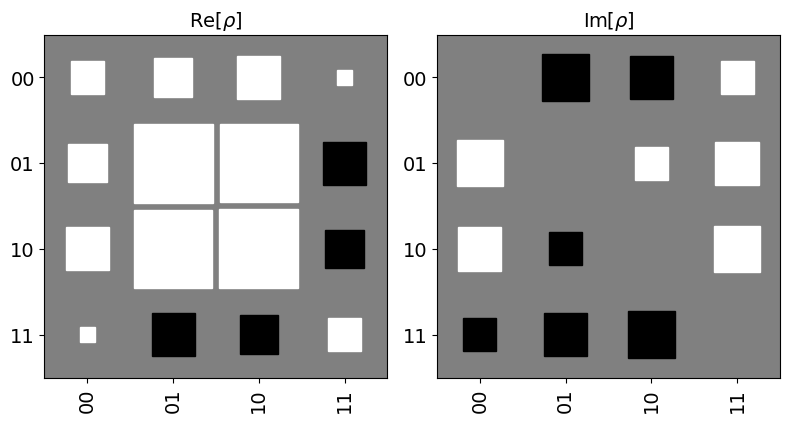

In [83]:
state.draw('hinton')

In [84]:
from qiskit.quantum_info import Operator

U = Operator(circuit)
U.data

array([[ 0.17405542-0.21106253j,  0.64958368-0.05655404j,
         0.17405542+0.21106253j,  0.64958368+0.05655404j],
       [ 0.64958368+0.05655404j, -0.17405542-0.21106253j,
         0.64958368-0.05655404j, -0.17405542+0.21106253j],
       [ 0.64958368-0.05655404j,  0.17405542-0.21106253j,
        -0.64958368-0.05655404j, -0.17405542-0.21106253j],
       [-0.17405542-0.21106253j,  0.64958368+0.05655404j,
         0.17405542-0.21106253j, -0.64958368+0.05655404j]])

In [85]:
from qiskit import BasicAer

bell = QuantumCircuit(2,2)
bell.h(0)
bell.cx(0,1)

meas = QuantumCircuit(2,2)
meas.measure([0,1],[0,1])
circuit_2 = bell.compose(meas)
simulator_2 = BasicAer.get_backend('qasm_simulator')
first_result = simulator_2.run(transpile(circuit_2, simulator_2), shots = 1000).result()
first_counts = first_result.get_counts(circuit_2)
print(first_counts)

{'11': 495, '00': 505}


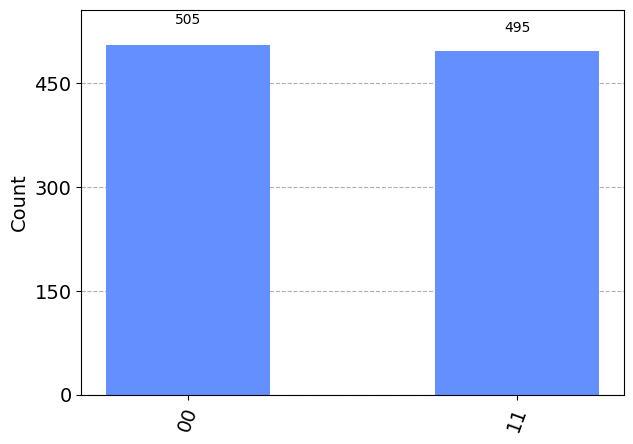

In [86]:
from qiskit.visualization import *
plot_histogram(first_counts)

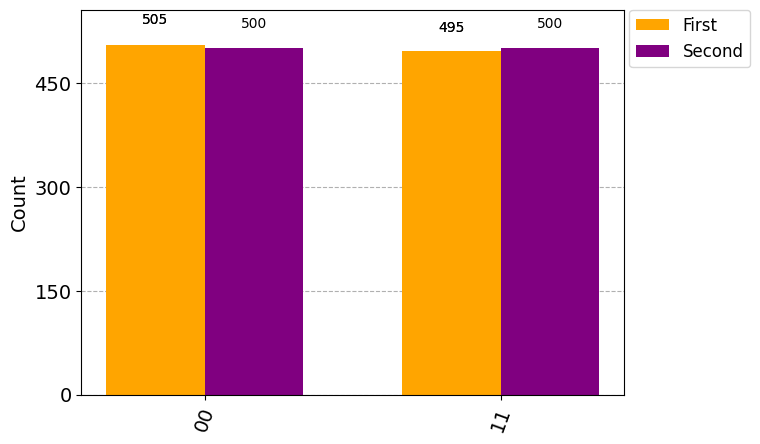

In [87]:
second_result = simulator_2.run(transpile(circuit_2, simulator_2),shots=1000).result()
second_counts = second_result.get_counts(circuit_2)
legend = ['First', 'Second']
plot_histogram([first_counts, second_counts], legend=legend, color=['orange','purple'])

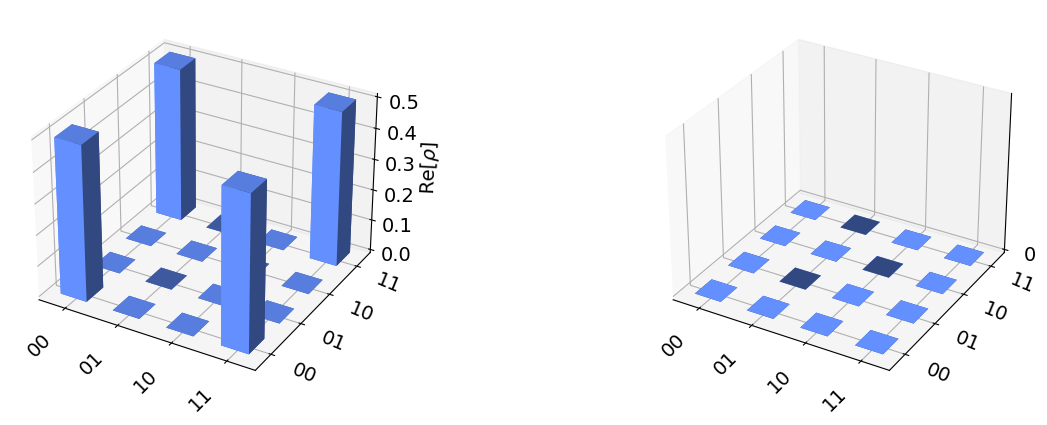

In [88]:
backend = BasicAer.get_backend('statevector_simulator')
new_result = backend.run(transpile(bell,backend)).result()
psi = new_result.get_statevector(bell)
plot_state_city(psi)